In [1]:
import os
import hoomd
import hoomd.md
import hoomd.deprecated
import ex_render
import numpy
import freud
import mbuild as mb
import matplotlib.pyplot as plt
%matplotlib inline 
import fresnel
import gsd
import gsd.fl
import gsd.hoomd
import gsd.pygsd
import numpy
import PIL
import IPython
import io
import math
import sys
import scipy
import time
import random

notice(2): Group "all" created containing 2048 particles
307 B atoms counted
512 C atoms counted
143 D atoms counted
NUM TYPES = [307, 512, 143]
###################################
Total Atoms in System = 2048
A Atoms: 1086
B Atoms: 307
C Atoms: 512
D Atoms: 143
####################################
0
307
819
!!!All Particle types and sizes updated!!!


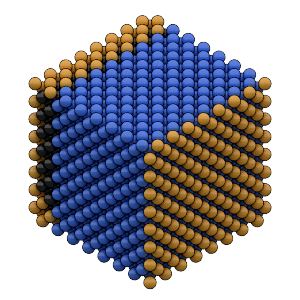

In [17]:
def build_system(conc=[0.10], types=['B'], type_sizes=[1.20], packing='fcc'):
    
    hoomd.context.initialize("")  # Make initial system of all A-type particles
    if packing == 'fcc':
        system = hoomd.init.create_lattice(unitcell=(hoomd.lattice.fcc(a=1.58)), n=8)
    elif packing == 'bcc':
        system = hoomd.init.create_lattice(unitcell=(hoomd.lattice.bcc(a=1.29)), n=8)  
    if conc[0] != 0.0: # If a second type of atom is to be added
        for t in types:
            system.particles.types.add(t) # add the type to the system
    num_atoms = len(system.particles) # Total num of atoms
    num_types = []  # Make a list of number of B types, C types, etc...
    for i, con in enumerate(conc):
        num_of_atoms = int(round(con*num_atoms,0))
        num_types.append(num_of_atoms)
        print('{} {} atoms counted'.format(num_of_atoms,types[i]))
        
    print('NUM TYPES = {}'.format(num_types))
    num_A = len(system.particles) - numpy.sum(num_types)
    print('###################################')
    print('Total Atoms in System = {}'.format(len(system.particles)))
    print('A Atoms: {}'.format(num_A))
    for n in range(0, len(types)):
        print('{} Atoms: {}'.format(types[n], num_types[n]))
    print('####################################')
    if conc != 0.0:
        start_index = 0
        for ind in range(0,len(types)):  # For each type of atom...
            print(start_index)
            for i in range(start_index, num_types[ind]):  # For how many particles of that atom are to be added
                system.particles[i].type = types[ind]
                system.particles[i].size = type_sizes[ind]
            start_index += num_types[ind]
        print('!!!All Particle types and sizes updated!!!')
            
    return system

system = build_system(conc=[0.15, 0.25, 0.07], types=['B', 'C', 'D'], type_sizes=[0.70, 0.65, 1.20])

ex_render.render_sphere_frame(system.take_snapshot(all=True))
#ex_render.render_disk_frame(system.take_snapshot(all=True))

In [18]:
hoomd.context.initialize("")
unit_cell = hoomd.lattice.bcc(a=1.30)
system = hoomd.init.create_lattice(unitcell=unit_cell, n=8)
snap = system.take_snapshot()
box = snap.box
print(box)
hoomd.update.box_resize(L=9, period=None)
snap = system.take_snapshot()
box = snap.box
print(box)









'''
print(system)
snap = system.take_snapshot()
#snap.data.boxdim
box = snap.box
print(box)
box.scale(sx=.75, sy=.75, sz=.75)
print(box)
system.restore_snapshot(snap)
print(system)
snap2 = system.take_snapshot()
box2 = snap.box
print(box2)
'''





'''
system.particles.types.add('B')
len(system.particles)
print(system.particles)
print(system.particles.types)
p = system.particles[0]
print(p.tag)
print(p.position)
print(p.velocity)
print(p.mass)
print(p.diameter)
print(p.type)
p.position = (1, 2, 3)
p.mass = 2
p.diameter = 2
print(p.position)
print(p.mass)
print(p.diameter)
p.type = 'B'
print(p.type)

print(system.particles[0].typeid)
print(system.particles[2].typeid)

'''

notice(2): Group "all" created containing 1024 particles
Box: Lx=10.4 Ly=10.4 Lz=10.400000000000002 xy=0.0 xz=0.0 yz=0.0 dimensions=3
Box: Lx=9.0 Ly=9.0 Lz=9.0 xy=0.0 xz=0.0 yz=0.0 dimensions=3


"\nsystem.particles.types.add('B')\nlen(system.particles)\nprint(system.particles)\nprint(system.particles.types)\np = system.particles[0]\nprint(p.tag)\nprint(p.position)\nprint(p.velocity)\nprint(p.mass)\nprint(p.diameter)\nprint(p.type)\np.position = (1, 2, 3)\np.mass = 2\np.diameter = 2\nprint(p.position)\nprint(p.mass)\nprint(p.diameter)\np.type = 'B'\nprint(p.type)\n\nprint(system.particles[0].typeid)\nprint(system.particles[2].typeid)\n\n"

notice(2): Group "all" created containing 2048 particles
205


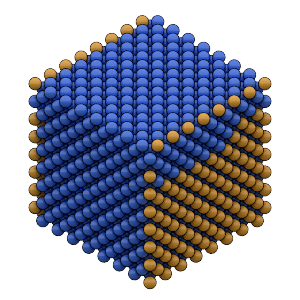

In [66]:
def build_system(conc=0.10, BSize=1.20, packing='fcc'):
    hoomd.context.initialize("")
    if packing == 'fcc':
        system = hoomd.init.create_lattice(unitcell=(hoomd.lattice.fcc(a=1.58)), n=8)
    elif packing == 'bcc':
        system = hoomd.init.create_lattice(unitcell=(hoomd.lattice.bcc(a=1.29)), n=8)
        
    system.particles.types.add('B')
    num_B = int(round(len(system.particles) * conc,0))
    print(num_B)
    for i in range(0, num_B):
        system.particles[i].type = 'B'
        system.particles[i].size = BSize
    
    return system
    
system = create_system(packing='fcc')

ex_render.render_sphere_frame(system.take_snapshot(all=True))

In [16]:
hoomd.context.initialize("")
unit_cell = hoomd.lattice.fcc(a=1.7,type_name='A')
system = hoomd.init.create_lattice(unitcell=unit_cell, n=8)
snapshot = system.take_snapshot(all=True)
particle_pos = snapshot.particles.position[:]
box = snapshot.box
print(box)
print(particle_pos[:10])
print('# of particles = {}'.format(len(particle_pos)))

notice(2): Group "all" created containing 2048 particles
Box: Lx=13.6 Ly=13.6 Lz=13.6 xy=0.0 xz=0.0 yz=0.0 dimensions=3
[[-5.95      -5.95      -5.95     ]
 [-5.95       6.7999997  6.7999997]
 [ 6.7999997 -5.95       6.7999997]
 [ 6.7999997  6.7999997 -5.95     ]
 [-5.95      -5.95      -4.25     ]
 [-5.95       6.7999997 -5.1      ]
 [ 6.7999997 -5.95      -5.1      ]
 [ 6.7999997  6.7999997 -4.25     ]
 [-5.95      -5.95      -2.55     ]
 [-5.95       6.7999997 -3.4      ]]
# of particles = 2048


notice(2): Group "all" created containing 2048 particles
Number of A Particles = 1741.0
Number of B Particles = 307.0
2048
2048
notice(2): Group "all" created containing 2048 particles


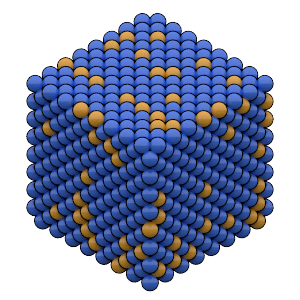

In [27]:
# SC: 14 L  with 1,728 particles
# BCC: 14 L
# Create initial lattice:

def create_system(packing='bcc', conc=0.50, Bsize=1.0, spacing=1.2):
    
    hoomd.context.initialize("")
    if packing == 'bcc':
        unit_cell = hoomd.lattice.bcc(a=spacing,type_name='A')
        system = hoomd.init.create_lattice(unitcell=unit_cell, n=10)
        L = 12.0  # Edge lengthe
    elif packing =='fcc':
        unit_cell = hoomd.lattice.fcc(a=spacing,type_name='A')
        system = hoomd.init.create_lattice(unitcell=unit_cell, n=8)
        L = 9.6  # Edge length

    snapshot = system.take_snapshot(all=True)
    ex_render.render_sphere_frame(snapshot)
    particle_pos = snapshot.particles.position[:]
    num_particles = len(particle_pos)
    A_num = round(num_particles * (1-conc),0)
    print('Number of A Particles = {}'.format(A_num))
    B_num = round(num_particles * conc,0)
    print('Number of B Particles = {}'.format(B_num))
    #box = snapshot.box
    particle_types = []
    diameters = []
    for i in range(0,int(A_num)):
        particle_types.append('A')
        diameters.append(1.0)
    for i in range(0,int(B_num)):
        particle_types.append('B')
        diameters.append(Bsize) 
    
    print(len(particle_types))
    print(len(diameters))
    random.shuffle(particle_types)
    hoomd.context.initialize("")
    uc = hoomd.lattice.unitcell(N=num_particles,
                            a1=[L, 0, 0],
                            a2=[0, L, 0],
                            a3=[0, 0, L],
                            dimensions=3,
                            position=particle_pos,
                            type_name=particle_types,
                            diameter=diameters);
    system = hoomd.init.create_lattice(unitcell=uc, n=[1, 1, 1]);
    
    return system
    
system = create_system('fcc', conc=0.15)
ex_render.render_sphere_frame(system.take_snapshot(all=True))

2000
2000
2000
notice(2): Group "all" created containing 2000 particles


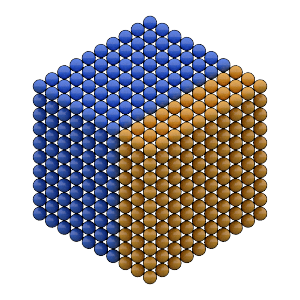

In [34]:
num_particles = len(particle_pos)
print(num_particles)
particle_types = []
diameters = []
for i in range(0,int(num_particles*0.70)):
    particle_types.append('A')
    diameters.append(1.0)

for i in range(0,int(num_particles*0.30)):
    particle_types.append('B')
    diameters.append(1.2)

print(len(particle_types))
print(len(diameters))

hoomd.context.initialize('');    
uc = hoomd.lattice.unitcell(N=num_particles,
                            a1=[12, 0, 0],
                            a2=[0, 12, 0],
                            a3=[0, 0, 12],
                            dimensions=3,
                            position=particle_pos,
                            type_name=particle_types,
                            diameter=diameters);
system = hoomd.init.create_lattice(unitcell=uc, n=[1, 1, 1]);

ex_render.render_sphere_frame(system.take_snapshot(all=True))

In [2]:
device = fresnel.Device(mode='cpu');
preview_tracer = fresnel.tracer.Preview(device, 300, 300, aa_level=3)
path_tracer = fresnel.tracer.Path(device, 300, 300)
blue = fresnel.color.linear([0.25,0.5,1])*0.9;
orange = fresnel.color.linear([1.0,0.714,0.169])*0.9

def display_movie(frame_gen, gsd_file):
    
    f = gsd.fl.GSDFile(gsd_file, 'rb')
    t = gsd.hoomd.HOOMDTrajectory(f)
    a = frame_gen(t[0]);

    if tuple(map(int, (PIL.__version__.split(".")))) < (3,4,0):
        print("Warning! Movie display output requires pillow 3.4.0 or newer.")
        print("Older versions of pillow may only display the first frame.")

    im0 = PIL.Image.fromarray(a[:,:, 0:3], mode='RGB').convert("P", palette=PIL.Image.ADAPTIVE);
    ims = [];
    for f in t[1:]:
        a = frame_gen(f);
        im = PIL.Image.fromarray(a[:,:, 0:3], mode='RGB')
        im_p = im.quantize(palette=im0);
        ims.append(im_p)

    f = io.BytesIO()
    im0.save(f, 'gif', save_all=True, append_images=ims, duration=1000, loop=0)

    if (sys.version_info[0] >= 3):
        size = len(f.getbuffer())/1024;
        if (size > 2000):
            print("Size:", size, "KiB")
            
    return IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [3]:
class A(mb.Compound):
    def __init__(self):
        super(A, self).__init__()

class B(mb.Compound):
    def __init__(self):
        super(B, self).__init__()

In [4]:
def mbuild_sys(conc=0.5, apf=0.52, n=1000, A_dia = 1.0, B_dia = 1.25):  # n number of particles
    file_name = '{}Conc-{}Dia-{}Den-init.gsd'.format(conc,B_dia,apf)
    file_path = '{}'.format(file_name)
    num_A = int(n * (1-conc))
    print('num_A = {}'.format(num_A))
    num_B = int(n * conc)
    print('num_B = {}'.format(num_B))
    total_vol = (4/3) * math.pi * ((num_A * (A_dia/2)**3) + (num_B*(B_dia/2)**3))
    print('total_vol = {}'.format(total_vol))
    L = total_vol / (apf * 1)  # Total vol of the box
    L**=(1/3) # Edge length of the box
    print('Volume of Box = {}'.format(L**3))
    print('APF Entered = {}'.format(apf))
    print('Actual APF = {}'.format(total_vol / (L**3)))
    box = mb.fill_box([A(), B()], n_compounds=[num_A, num_B], box=[L]*3)      
    box.save(file_path, overwrite=True)
    
    return file_path

In [26]:
def mbuild_sys2(conc=0.5, apf=0.25, n=1000, A_dia = 1.0, B_dia = 1.25):  # n number of particles
    
    # A = Iron, Atomic radius = 126 pm, Atomic diameter = 252 pm = 0.252 nm
    # 1 sigma = 0.252 nm
    
    divisor = 1
    A_dia = 0.252  # nano-meters, 2 x radius of Fe
    B_mult = B_dia
    B_dia = A_dia * B_mult # B-atom diameter is 1.25 times larger than A-atom diameter
    file_name = '{}Conc-{}Dia-{}Den-init-{}.gsd'.format(conc,B_dia,apf, divisor)
    file_path = '{}'.format(file_name)
    
    num_A = int(n * (1-conc))  # Number of A-type atoms out of 1,000 atoms
    print('num_A = {}'.format(num_A))
    num_B = int(n * conc) # Number of B-type atoms out of 1,000 atoms
    print('num_B = {}'.format(num_B))
    rad_A = A_dia / 2  # Radius of A atoms
    print('rad_A = {}'.format(rad_A))
    rad_B = B_dia / 2  # Radius of B atoms
    print('rad_B = {}'.format(rad_B))
    vol_A = num_A * 4/3 * math.pi * (rad_A**3)  # Total vol of all A atoms
    print('vol_A = {}'.format(vol_A))
    vol_B = num_B * 4/3 * math.pi * (rad_B**3)  # Total vol of all B atoms
    print('vol_B = {}'.format(vol_B))
    total_vol = vol_A + vol_B  # Total vol of all of the atoms in the system
    print('total_vol = {}'.format(total_vol))
    #total_vol = (4/3) * math.pi * ((num_A * (A_dia/2)**3) + (num_B*(B_dia/2)**3))
    L = (total_vol / (apf * divisor))**(1/3)
    print('Volume of Box = {}'.format(L**3))
    print('APF Entered = {}'.format(apf))
    print('Actual APF = {}'.format(total_vol / (L**3)))
    #L = total_vol / (apf * 10)  # Total vol of the box
    #L**=(1/3) # Edge length of the box
    box = mb.fill_box([A(), B()], n_compounds=[num_A, num_B], box=[L, L, L], )  # Create a fill the box
    box.save(file_path, overwrite=True)
    
    return file_path

In [27]:
system2 = mbuild_sys2(apf=0.50)

num_A = 500
num_B = 500
rad_A = 0.126
rad_B = 0.1575
vol_A = 4.18957769734489
vol_B = 8.18276894012674
total_vol = 12.37234663747163
Volume of Box = 24.744693274943252
APF Entered = 0.5
Actual APF = 0.5000000000000001


/home/chris/anaconda3/envs/hoomd/lib/python3.6/site-packages/mbuild/compound.py:2203: UserWarning: Guessing that "<A pos=( 1.4573, 1.9070, 2.4224), 0 bonds, id: 140040654012712>" is element: "EP"
  atom, element))


In [7]:
display_movie(frame_gen=render_sphere_frame, gsd_file='{}'.format(system2))

NameError: name 'render_sphere_frame' is not defined